In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../common')
from utils import process_group

In [2]:
avg_039, t_el, ql_dyn, ql_sta = process_group(group='B039',
                                              num_sections=10,
                                              prefix='/home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ', 
                                              zone_idx='auto',
                                              num_cores=24)

2023-12-08 01:17:51,863 utils                   : total number of files in B039  is 2780
2023-12-08 01:18:01,933 utils                   : label='B039_section_05': remove 33 datasets out of 278
2023-12-08 01:18:01,933 utils                   : label='B039_section_01': remove 31 datasets out of 278
2023-12-08 01:18:01,951 utils                   : label='B039_section_08': remove 30 datasets out of 278
2023-12-08 01:18:02,054 utils                   : label='B039_section_00': remove 28 datasets out of 278
2023-12-08 01:18:02,094 utils                   : label='B039_section_09': remove 32 datasets out of 278
2023-12-08 01:18:02,160 utils                   : label='B039_section_06': remove 29 datasets out of 278
2023-12-08 01:18:02,369 utils                   : label='B039_section_04': remove 32 datasets out of 278
2023-12-08 01:18:02,401 utils                   : label='B039_section_07': remove 32 datasets out of 278
2023-12-08 01:18:02,408 utils                   : label='B039_section_0

In [3]:
avg_040, _, _, _ = process_group(group='B040',
                                 num_sections=10, 
                                 prefix='/home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ',
                                 zone_idx='auto',
                                 num_cores=24)

2023-12-08 01:18:03,870 utils                   : total number of files in B040  is 2780
2023-12-08 01:18:14,205 utils                   : label='B040_section_00': remove 31 datasets out of 278
2023-12-08 01:18:14,417 utils                   : label='B040_section_06': remove 31 datasets out of 278
2023-12-08 01:18:14,417 utils                   : label='B040_section_04': remove 32 datasets out of 278
2023-12-08 01:18:14,613 utils                   : label='B040_section_01': remove 34 datasets out of 278
2023-12-08 01:18:14,619 utils                   : label='B040_section_05': remove 31 datasets out of 278
2023-12-08 01:18:14,632 utils                   : label='B040_section_03': remove 31 datasets out of 278
2023-12-08 01:18:14,818 utils                   : label='B040_section_07': remove 31 datasets out of 278
2023-12-08 01:18:14,990 utils                   : label='B040_section_08': remove 33 datasets out of 278
2023-12-08 01:18:15,223 utils                   : label='B040_section_0

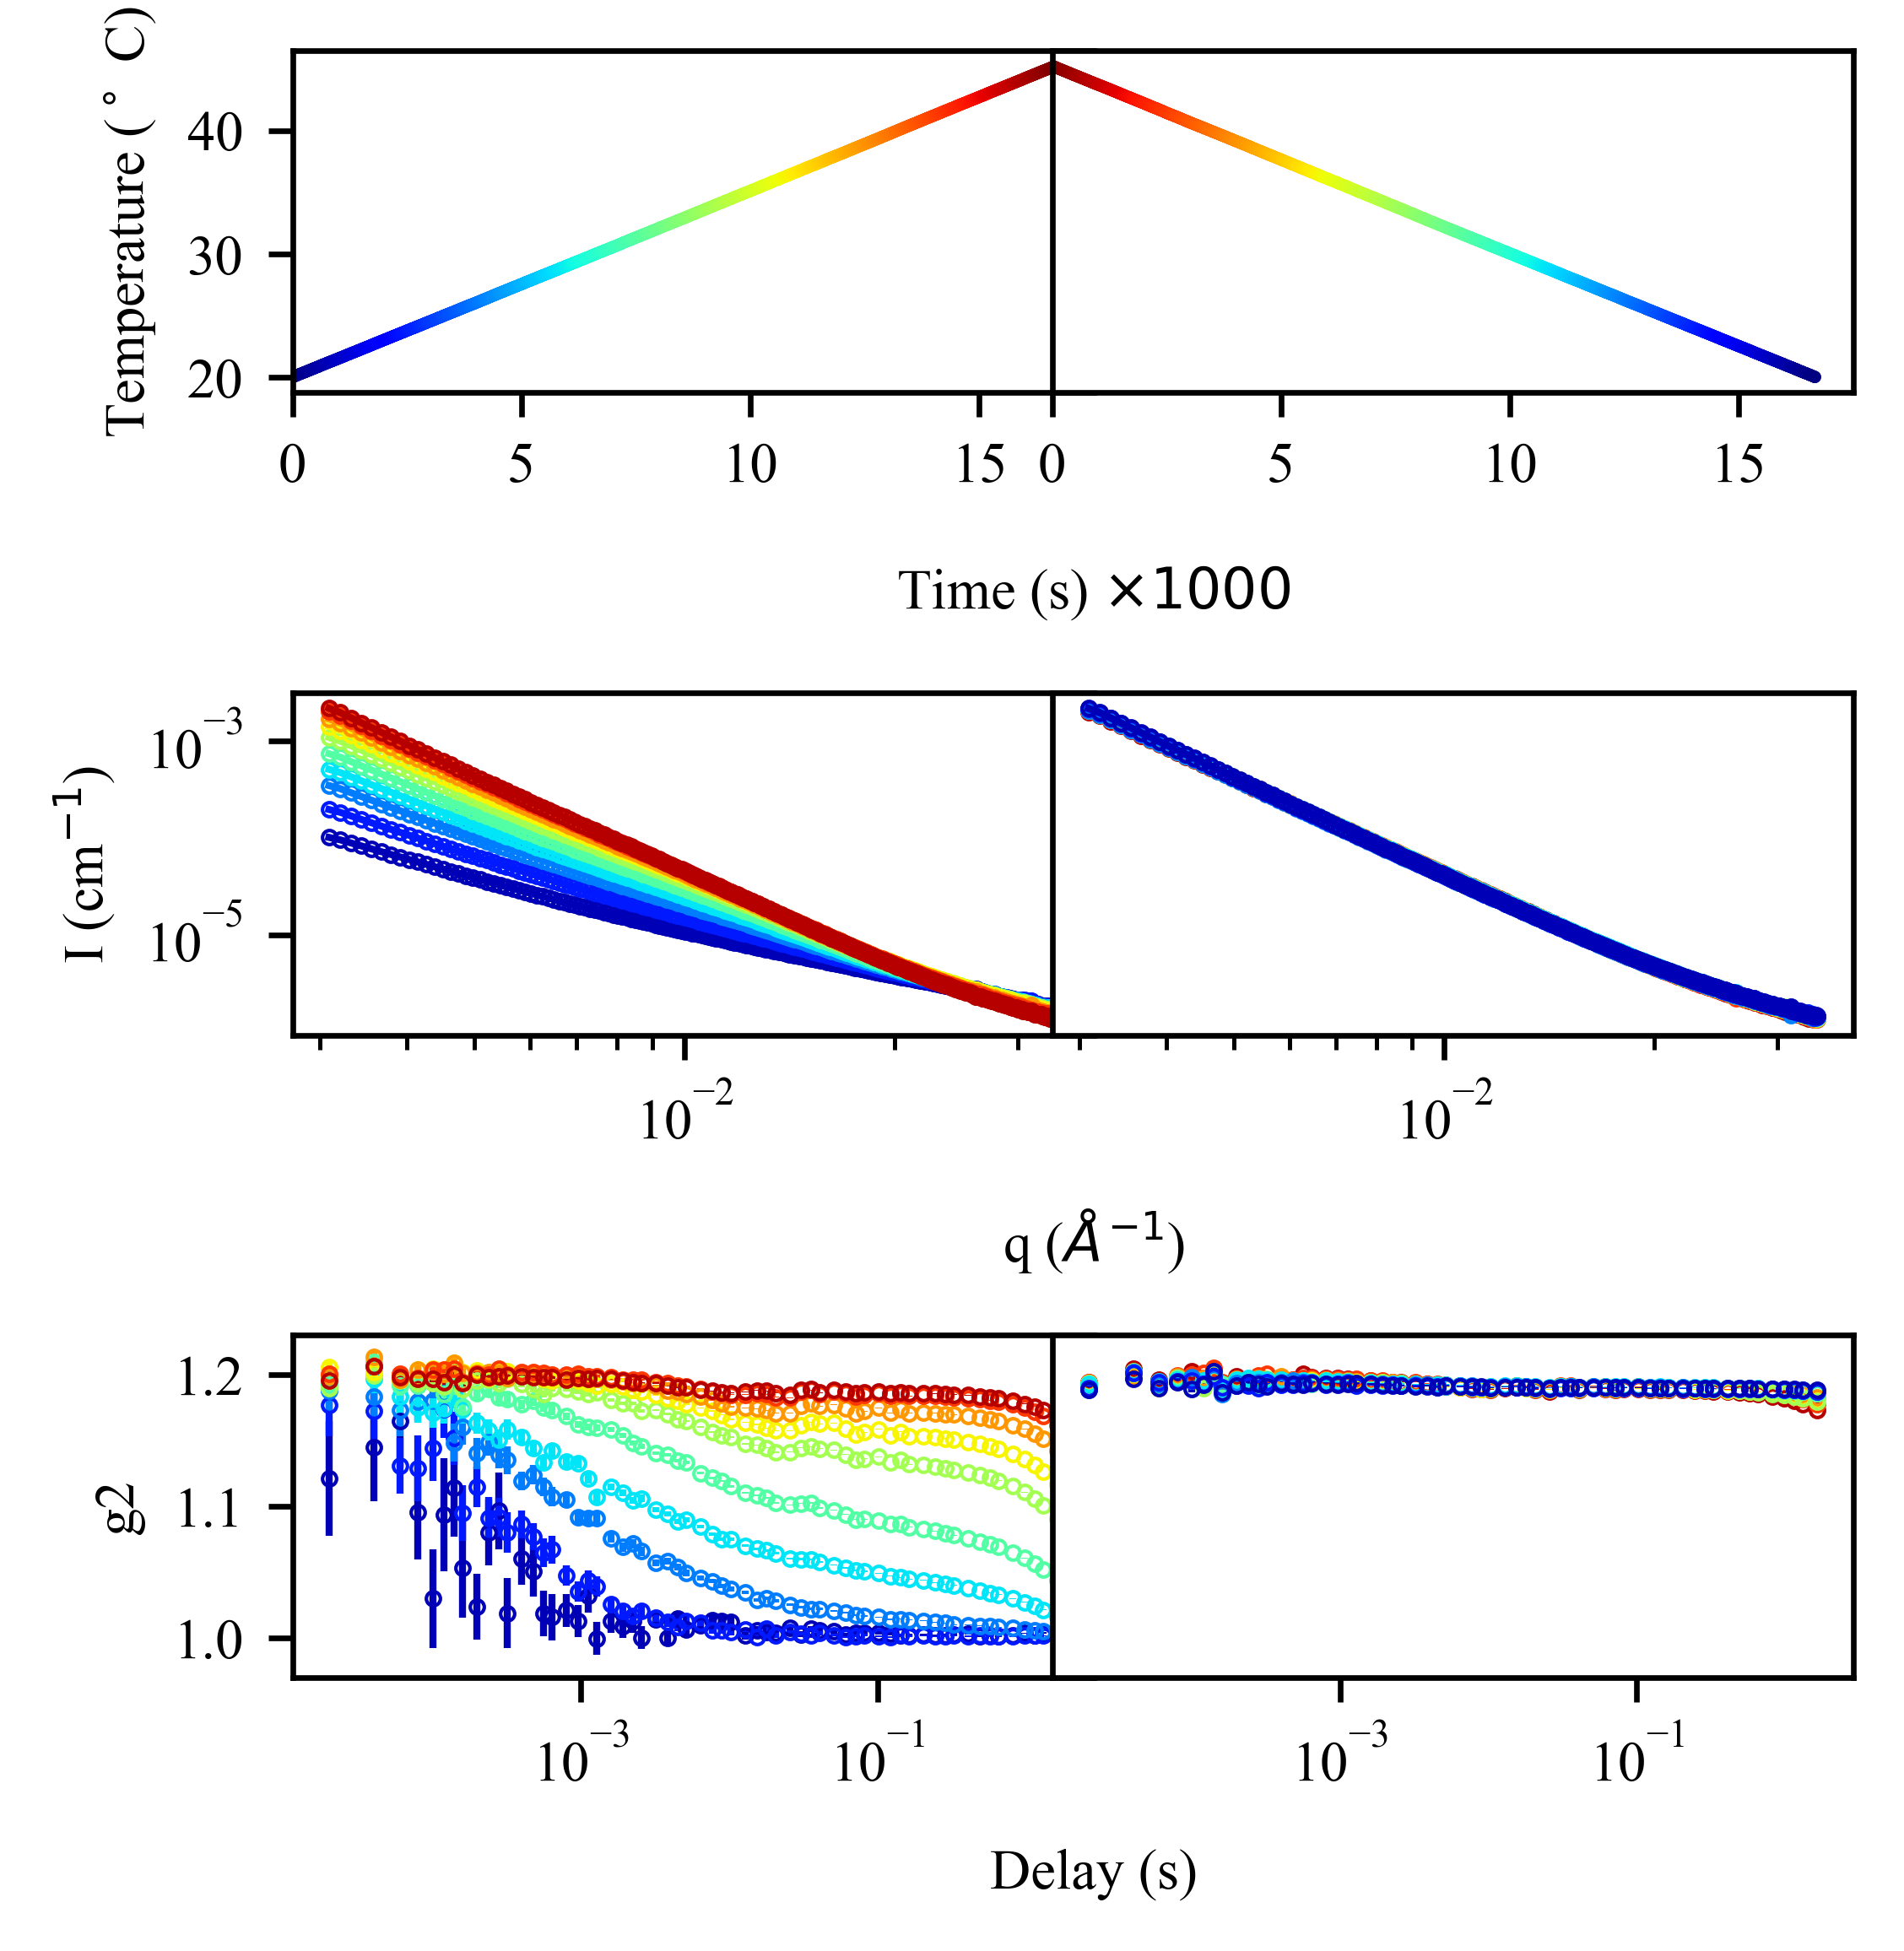

In [7]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600


fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)



def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size
        # print(idx.shape, np.min(idx), np.max(idx))
        # ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'], color=idx, cmap=plt.cm.jet)
        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], c=cmap(idx), s=0.5)

        color = cmap(np.mean(idx))
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o-', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        
        # ax[2].plot(t_el, avg_dict['g2'][:, g2_idx], 'o--', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx],  yerr=avg_dict['g2_err'][:, g2_idx],
                       fmt='o', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        # x, y, yerr=None, xerr=None, fmt='', ecolor=None,
        ax[2].set_ylim(0.97, 1.23)
        
    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

        ax[0].set_xlabel('Time (s) $\\times 1000$')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Delay (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')
        
plot_one_column(ax[:, 0], avg_039)
plot_one_column(ax[:, 1], avg_040, second_column=True)
 
plt.tight_layout(w_pad=-1, h_pad=0.125)
plt.savefig('figure2.png', dpi=300)
# plt.savefig('figure2.pdf')
# plt.tight_layout()

In [5]:
avg_039

[{'g2': array([[1.121, 1.117, 1.083, ..., 0.   , 0.   , 0.   ],
         [1.145, 1.236, 1.031, ..., 0.   , 0.   , 0.   ],
         [1.165, 1.036, 1.036, ..., 0.   , 0.   , 0.   ],
         ...,
         [1.002, 1.003, 1.001, ..., 0.873, 1.046, 0.725],
         [1.004, 1.001, 1.001, ..., 0.842, 1.079, 0.732],
         [1.003, 1.003, 1.   , ..., 0.804, 1.023, 0.577]], dtype=float32),
  'g2_err': array([[0.044, 0.046, 0.038, ..., 0.   , 0.   , 0.   ],
         [0.041, 0.043, 0.038, ..., 0.   , 0.   , 0.   ],
         [0.035, 0.041, 0.041, ..., 0.   , 0.   , 0.   ],
         ...,
         [0.001, 0.001, 0.001, ..., 0.   , 0.   , 0.   ],
         [0.001, 0.001, 0.   , ..., 0.   , 0.   , 0.   ],
         [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]], dtype=float32),
  'saxs_1d': array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,